# TAM AI And ML Club WorkShop

# IPL Score Prediction

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

In [3]:
data = pd.read_csv('ipl.csv')

In [4]:
data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


# Data Summarization

In [5]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
data.shape

(76014, 15)

In [7]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [8]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [9]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [10]:
data.corr()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.026470,-0.055220,0.002487,0.045320,-0.031886,0.033432,0.049975,0.096586
runs,0.026470,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,-0.055220,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.002487,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282
runs_last_5,0.045320,0.750565,0.242942,0.629374,1.000000,0.058672,0.675924,0.501475,0.368253
wickets_last_5,-0.031886,0.297768,0.693740,0.382850,0.058672,1.000000,-0.214576,-0.421250,-0.273475
striker,0.033432,0.594818,0.019712,0.477508,0.675924,-0.214576,1.000000,0.554439,0.381664
non-striker,0.049975,0.315422,-0.171962,0.236430,0.501475,-0.421250,0.554439,1.000000,0.293233
total,0.096586,0.254498,-0.337343,0.022282,0.368253,-0.273475,0.381664,0.293233,1.000000


In [11]:
#Removing unwanted columns
col_remove = ['mid', 'striker', 'non-striker','batsman', 'bowler', 'date']
print('Before removing unwanted columns: {}'.format(data.shape))
data.drop(labels = col_remove, axis = 1, inplace = True)
print('After removing unwanted columns: {}'.format(data.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [12]:
data.columns

Index(['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [13]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [14]:
#Replace the data of Deccan Chargers to Sunrisers Hyderabad
data['bat_team'] = data['bat_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data['bowl_team'] = data['bowl_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')      

In [15]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [16]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [17]:
#keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(data.shape))
data=data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(data.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (62464, 9)


In [18]:
#Removing the first 5 overs data in every match
data = data[data['overs']>=5.0]

In [19]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association St

In [20]:
Grounds = [ 'Wankhede Stadium', 'Sharjah Cricket Stadium', 'Sheikh Zayed Stadium', 'Sardar Patel Stadium, Motera', 'Rajiv Gandhi International Stadium, Uppal',
          'Punjab Cricket Association Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali', 'M Chinnaswamy Stadium'
          ,'MA Chidambaram Stadium, Chepauk', 'Eden Gardens', 'Dubai International Cricket Stadium','Saurashtra Cricket Association Stadium','Vidarbha Cricket Association Stadium, Jamtha' ]

In [21]:
#keeping only consistent venues
print('Before removing inconsistent venues: {}'.format(data.shape))
data=data[(data['venue'].isin(Grounds))]
print('After removing inconsistent venues: {}'.format(data.shape))

Before removing inconsistent venues: (46560, 9)
After removing inconsistent venues: (28624, 9)


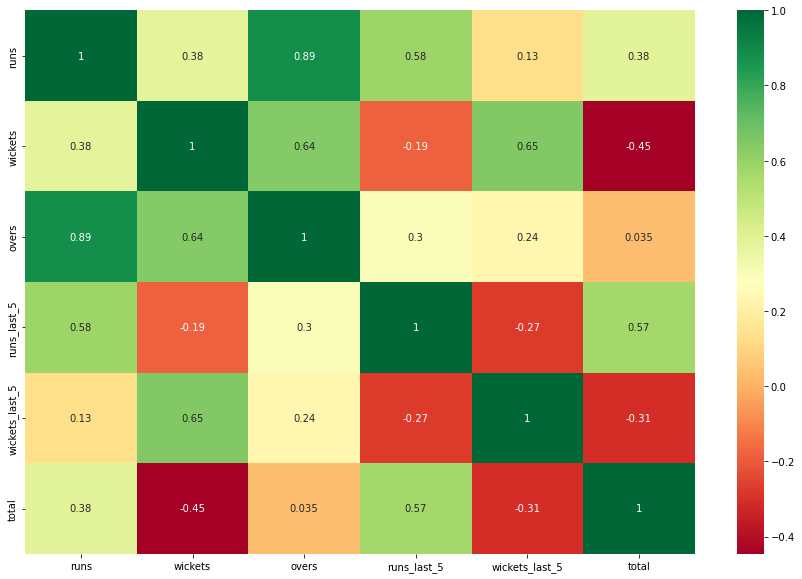

In [22]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(15,10))
g = sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# Data Preprocessing

In [23]:
encode = pd.get_dummies(data=data, columns=['bat_team','bowl_team','venue'])
encode.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'ven

In [24]:
data.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [25]:
encode.tail()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
75884,106,9,18.1,29,4,107,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
75885,107,9,18.2,29,4,107,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
75886,107,9,18.3,28,4,107,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
75887,107,9,18.4,24,4,107,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
75888,107,10,18.5,23,5,107,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [26]:
encode = encode[[ 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad', 'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens','venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
              'venue_Punjab Cricket Association IS Bindra Stadium, Mohali','venue_Punjab Cricket Association Stadium, Mohali','venue_Rajiv Gandhi International Stadium, Uppal','venue_Sardar Patel Stadium, Motera', 'venue_Sharjah Cricket Stadium', 
              'venue_Wankhede Stadium',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [27]:
encode.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,"venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.1,61,0,59,0,222
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.2,61,1,59,1,222
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.3,61,1,59,1,222
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.4,61,1,59,1,222
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,5.5,61,1,58,1,222


In [28]:
x = encode.iloc[:,:-1]
y = encode.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (22899, 31) and Test set: (5725, 31)


In [29]:
X_train

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
70321,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.1,105,1,42,1
72220,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,19.2,131,9,25,3
1671,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,10.2,76,4,32,2
27800,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,14.4,80,5,27,3
53754,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,19.1,148,6,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32403,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,8.4,58,2,34,2
13879,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,7.2,50,4,36,3
57259,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,6.5,58,1,45,1
36889,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.3,104,4,34,1


# Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred_lr = linear_regressor.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.metrics import r2_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))
print("R2 Score : %.2f" %r2_score(y_test,y_pred_lr))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.954815394750081
Mean Squared Error (MSE): 294.05561096463117
Root Mean Squared Error (RMSE): 17.148049771464716
R2 Score : 0.66


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(solver='liblinear')
logistic_regressor.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [34]:
y_pred_lgr = logistic_regressor.predict(X_test)

In [35]:
print("---- Logistic Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lgr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lgr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lgr))))
print("R2 Score : %.2f" % r2_score(y_test,y_pred_lgr))

---- Logistic Regression - Model Evaluation ----
Mean Absolute Error (MAE): 6.97938864628821
Mean Squared Error (MSE): 228.6031441048035
Root Mean Squared Error (RMSE): 15.119627776661815
R2 Score : 0.74


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(min_samples_leaf=.000001)
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=1e-06)

In [37]:
y_pred_dt = decision_regressor.predict(X_test)

In [38]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error(RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_dt))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 2.472139737991266
Mean Squared Error (MSE): 73.30803493449781
Root Mean Squared Error(RMSE): 8.562011150103567
R2 score : 0.92


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred_rf = random_regressor.predict(X_test)

In [41]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rf))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 3.0740704512372634
Mean Squared Error (MSE): 30.678348140950995
Root Mean Squared Error (RMSE): 5.538803854710058
R2 score : 0.96


# Gradient Boosting Regressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  ExtraTreesRegressor
import xgboost
from xgboost import XGBRegressor

In [43]:
gbr=GradientBoostingRegressor(n_estimators=10000)
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

In [44]:
# Gradient Boosting Regression - Model Evaluation
print("---- Gradient Boosting Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_gbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_gbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_gbr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbr))

---- Gradient Boosting Regression - Model Evaluation ----
Mean Absolute Error (MAE): 5.773357809726085
Mean Squared Error (MSE): 69.62039526118411
Root Mean Squared Error (RMSE): 8.343883703718797
R2 score : 0.92


# Extra Trees Regressor 

In [45]:
etr=ExtraTreesRegressor(n_estimators=1000)
etr.fit(X_train,y_train)
y_pred_etr = etr.predict(X_test)

In [46]:
# Extra Trees Regression - Model Evaluation
print("---- Extra Trees Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_etr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_etr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_etr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_etr))

---- Extra Trees Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1.324909868995633
Mean Squared Error (MSE): 13.252200515021837
Root Mean Squared Error (RMSE): 3.640357196075934
R2 score : 0.98


# XGB Regressor

In [47]:
xgbr=XGBRegressor(n_estimators=10000)
xgbr.fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)
print("---- XGBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_xgbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_xgbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_xgbr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_xgbr))

---- XGBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 3.180970248426412
Mean Squared Error (MSE): 28.521736084177853
Root Mean Squared Error (RMSE): 5.340574508812498
R2 score : 0.97


In [48]:
# XGBoost Regression - Model Evaluation
print("---- XGBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_xgbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_xgbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_xgbr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_xgbr))

---- XGBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 3.180970248426412
Mean Squared Error (MSE): 28.521736084177853
Root Mean Squared Error (RMSE): 5.340574508812498
R2 score : 0.97


# Predictions

In [49]:
def predict_score(batting_team, bowling_team, venue, overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]
    
  #venue
  if venue == 'Dubai International Cricket Stadium':
    temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0]
  elif venue == 'Eden Gardens':
    temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0]
  elif venue == 'M Chinnaswamy Stadium':
    temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0]
  elif venue == 'MA Chidambaram Stadium, Chepauk':
    temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0]
  elif venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali':
    temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0]
  elif venue == 'Punjab Cricket Association Stadium, Mohali':
    temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0]
  elif venue == 'Rajiv Gandhi International Stadium, Uppal':
    temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0]
  elif venue == 'Sardar Patel Stadium, Motera':
    temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0]
  elif venue == 'Sharjah Cricket Stadium':
    temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0]
  elif venue == 'Wankhede Stadium':
    temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(etr.predict(temp_array)[0])


# Prediction 1

In [50]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', venue='Eden Gardens', overs=17.2, runs=111, wickets=4, runs_in_prev_5=26, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-8, final_score+8))

The final predicted score (range): 125 to 141


In [51]:
final_score = predict_score(batting_team='Royal Challengers Bangalore', bowling_team='Kolkata Knight Riders', venue='M Chinnaswamy Stadium', overs=15, runs=142, wickets=1, runs_in_prev_5=64, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 184 to 199


In [52]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Chennai Super Kings', venue='Rajiv Gandhi International Stadium, Uppal', overs=10, runs=70, wickets=2, runs_in_prev_5=25, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-8, final_score+8))

The final predicted score (range): 139 to 155


In [53]:
import pickle
filename = 'pipe.pkl'
pickle.dump(random_regressor, open(filename, 'wb'))